In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, Input
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir, chdir

## Data Generation

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    zoom_range = (0.85, 0.95),
    horizontal_flip = True,
    vertical_flip = False,
    data_format = 'channels_last',
    validation_split = 0.15,
    dtype = tf.float32
)

train_generator = datagen.flow_from_directory('chest_xray_data/train', 
                                              target_size=(120,120),
                                              batch_size=16, color_mode='grayscale', 
                                              class_mode='categorical', shuffle=True, 
                                              subset='training', seed=123)

val_generator = datagen.flow_from_directory('chest_xray_data/train', 
                                              target_size=(120,120),
                                              batch_size=16, color_mode='grayscale', 
                                              class_mode='categorical', shuffle=True, 
                                              subset='validation', seed=123) 

Found 849 images belonging to 2 classes.
Found 149 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}

## Model Generation

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, data_format="channels_last", padding='same', input_shape=(120,120,1)))

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation  ('relu'))

model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D())

#model.add(Conv2D(128, 3, padding='same'))
#model.add(Activation('relu'))

#model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64)) # 16
Activation('relu')
model.add(Dropout(0.5))

model.add(Dense(32)) # 16
Activation('relu')
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid')) # softmax

# categorical_crossentropy
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) # adam, adadelta, keras.optimizers.SGD()?
print(model.summary())

## Training

In [ ]:
hist = model.fit(train_generator, validation_data=val_generator , epochs=15, batch_size=16)

Epoch 1/15
54/54 [==============================] - 11s 190ms/step - loss: 0.7018 - accuracy: 0.6181 - val_loss: 0.7105 - val_accuracy: 0.6443
Epoch 2/15
54/54 [==============================] - 10s 183ms/step - loss: 0.6247 - accuracy: 0.6770 - val_loss: 0.4520 - val_accuracy: 0.8054
Epoch 3/15
54/54 [==============================] - 10s 184ms/step - loss: 0.4483 - accuracy: 0.7984 - val_loss: 0.3809 - val_accuracy: 0.8322
Epoch 4/15
54/54 [==============================] - 10s 184ms/step - loss: 0.4219 - accuracy: 0.8356 - val_loss: 0.2512 - val_accuracy: 0.8926
Epoch 5/15
54/54 [==============================] - 10s 185ms/step - loss: 0.3110 - accuracy: 0.8755 - val_loss: 0.2506 - val_accuracy: 0.8993
Epoch 6/15
54/54 [==============================] - 10s 185ms/step - loss: 0.2806 - accuracy: 0.8962 - val_loss: 0.2419 - val_accuracy: 0.9128
Epoch 7/15
54/54 [==============================] - 10s 184ms/step - loss: 0.2902 - accuracy: 0.8863 - val_loss: 0.2486 - val_accuracy: 0.8926

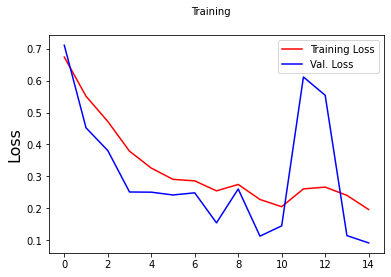

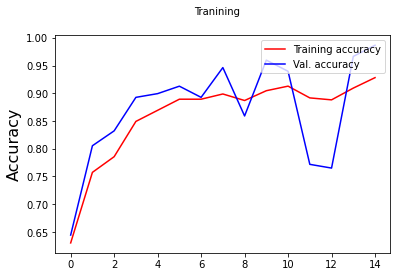

In [ ]:
plt.suptitle('Training', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Val. Loss')
plt.legend(loc='upper right')
plt.show()

plt.suptitle('Tranining', fontsize=10)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='r', label='Training accuracy')
plt.plot(hist.history['val_accuracy'], color ='b', label='Val. accuracy')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.save('models/x_ray_modelV3.h5')

## Convert to TFlite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert() 

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0stfkldc/assets


INFO:tensorflow:Assets written to: /tmp/tmp0stfkldc/assets
